<a href="https://colab.research.google.com/github/shubham2721/Case-Studies-Solution-and-Assignments/blob/main/Analyse_the_quality_and_behaviour_of_acquired_users_over_weeks_of_acquisition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <H1>**Date on date Install vs purchase over next five weeks of installation**</H1>

## <b>Problem Statement:</b>
ABC is an E-Commerce. It has an app where customers can purchase.
Marketing team at ABC wants to analyse the quality and behaviour of acquired users over weeks of acquisition.

**Output required** : Give a cohort view for Nov and Dec 2019, Date on date Install vs purchase over next five weeks of installation.


In [1]:
# this library is used to download data from the link 
!pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# <b>Importing Necessary Libraries</b>
- **pandas** - Data Transformation and manipulation
- **numpy** - Provides Mathematical Functions
- **opendatasets** - for downloading datasets from open links
- **datetime** - for manipulating dates and times

In [2]:
import pandas as pd
import numpy as np
import opendatasets as od
import datetime

In [3]:
# Downloading Data Sets
od.download('https://drive.google.com/file/d/1DT6ZBhEOXBCsOobQqW0xKwdVSgK_Tg-I/view?usp=sharing')
od.download('https://drive.google.com/file/d/1iWFR6PWYnEGeyXAvEJ1n4OQ2ap8audFY/view?usp=sharing')

1510613it [00:00, 235765801.46it/s]


Downloaded to  ./install.csv


291439it [00:00, 189428756.15it/s]

Downloaded to  ./purchase.csv


**Data Summary:** 
- `install.csv` gives the data for each install, install date and source.
- purchase.csv gives the install date of the purchase made, purchase date and source.


In [4]:
#Loading Datasets to two different DataFrames
install = pd.read_csv('/content/install.csv')
purchase = pd.read_csv('/content/purchase.csv')

In [5]:
#viewing the first five rows of install dataframe
install.head()

,Event Name,Media Source,Install Date
0,install,Facebook Ads,2019-11-30
1,install,Facebook Ads,2019-11-30
2,install,Facebook Ads,2019-11-30
3,install,Facebook Ads,2019-11-30
4,install,Facebook Ads,2019-11-30


In [6]:
install.dtypes

Event Name      object
Media Source    object
Install Date    object
dtype: object

Counting the total number of installs per day and storing them to total_install_counts

In [7]:
total_install_counts = install.groupby(by = 'Install Date').count().drop(columns = 'Media Source').reset_index()
total_install_counts.rename(columns = {'Event Name': 'No of Installs'}, inplace = True) # renaming the column name

In [8]:
total_install_counts.head()

,Install Date,No of Installs
0,2019-11-01,1031
1,2019-11-02,1177
2,2019-11-03,1335
3,2019-11-04,777
4,2019-11-05,977


In [9]:
total_install_counts.shape

(60, 2)

Counting the total number of purchase made week wise according to their install date

In [10]:
#viewing the first five rows of purchase dataframe
purchase.head()

,Install Time,Event Time,Event Name,Media Source
0,2019-11-30 22:08:07,2019-11-30 23:17:10,af_purchase,Facebook Ads
1,2019-11-30 15:22:04,2019-11-30 22:52:38,af_purchase,Facebook Ads
2,2019-11-30 22:10:07,2019-11-30 22:43:50,af_purchase,Facebook Ads
3,2019-11-30 15:24:47,2019-11-30 22:43:37,af_purchase,Facebook Ads
4,2019-11-26 23:12:56,2019-11-30 22:38:23,af_purchase,Facebook Ads


In [11]:
purchase.dtypes

Install Time    object
Event Time      object
Event Name      object
Media Source    object
dtype: object

In [12]:
#Converting the Install Time and Event Time from object to Date time format
purchase['Install Time'] = pd.to_datetime(purchase['Install Time'])
purchase['Event Time'] = pd.to_datetime(purchase['Event Time'])

Creating Two new columns for only Date as based on this columns week wise count will be calculated.

![Image](https:// [link text](https://))https://miro.medium.com/max/1400/1*iNZ03wgi3djsRbMx5gD9jA.png

In [13]:
purchase['Install Date'] = purchase['Install Time'].dt.strftime("%Y-%m-%d")
purchase['Event Date'] = purchase['Event Time'].dt.strftime("%Y-%m-%d")

In [14]:
purchase.head()

,Install Time,Event Time,Event Name,Media Source,Install Date,Event Date
0,2019-11-30 22:08:07,2019-11-30 23:17:10,af_purchase,Facebook Ads,2019-11-30,2019-11-30
1,2019-11-30 15:22:04,2019-11-30 22:52:38,af_purchase,Facebook Ads,2019-11-30,2019-11-30
2,2019-11-30 22:10:07,2019-11-30 22:43:50,af_purchase,Facebook Ads,2019-11-30,2019-11-30
3,2019-11-30 15:24:47,2019-11-30 22:43:37,af_purchase,Facebook Ads,2019-11-30,2019-11-30
4,2019-11-26 23:12:56,2019-11-30 22:38:23,af_purchase,Facebook Ads,2019-11-26,2019-11-30


For segregating the data week wise we need one more column which will calculate the difference between install date-time and purchase date-time

In [15]:
purchase['week time'] = purchase['Event Time'] - purchase['Install Time'] # this column will have timedelta format as shown below

In [16]:
purchase.dtypes

Install Time     datetime64[ns]
Event Time       datetime64[ns]
Event Name               object
Media Source             object
Install Date             object
Event Date               object
week time       timedelta64[ns]
dtype: object

In [17]:
purchase.head()

,Install Time,Event Time,Event Name,Media Source,Install Date,Event Date,week time
0,2019-11-30 22:08:07,2019-11-30 23:17:10,af_purchase,Facebook Ads,2019-11-30,2019-11-30,0 days 01:09:03
1,2019-11-30 15:22:04,2019-11-30 22:52:38,af_purchase,Facebook Ads,2019-11-30,2019-11-30,0 days 07:30:34
2,2019-11-30 22:10:07,2019-11-30 22:43:50,af_purchase,Facebook Ads,2019-11-30,2019-11-30,0 days 00:33:43
3,2019-11-30 15:24:47,2019-11-30 22:43:37,af_purchase,Facebook Ads,2019-11-30,2019-11-30,0 days 07:18:50
4,2019-11-26 23:12:56,2019-11-30 22:38:23,af_purchase,Facebook Ads,2019-11-26,2019-11-30,3 days 23:25:27


We will calculate the weeks based on total number of seconds 
- In one week total number of seconds is **'604800'**

In [18]:
purchase['week time in sec'] = purchase['week time'].dt.total_seconds()

In [19]:
df = purchase 

In [20]:
# Segregating week wise based on seconds
df['Weeks'] = np.where(df['week time in sec']<= 604800, 'Purchase Week 1',
                     np.where(df['week time in sec']<= 2*604800, 'Purchase Week 2',
                      np.where(df['week time in sec']<= 3*604800, 'Purchase Week 3',
                               np.where(df['week time in sec']<= 4*604800, 'Purchase Week 4',
                                        np.where(df['week time in sec']<= 5*604800, 'Purchase Week 5','After 5 Weeks')))))

In [21]:
df.head()

,Install Time,Event Time,Event Name,Media Source,Install Date,Event Date,week time,week time in sec,Weeks
0,2019-11-30 22:08:07,2019-11-30 23:17:10,af_purchase,Facebook Ads,2019-11-30,2019-11-30,0 days 01:09:03,4143.0,Purchase Week 1
1,2019-11-30 15:22:04,2019-11-30 22:52:38,af_purchase,Facebook Ads,2019-11-30,2019-11-30,0 days 07:30:34,27034.0,Purchase Week 1
2,2019-11-30 22:10:07,2019-11-30 22:43:50,af_purchase,Facebook Ads,2019-11-30,2019-11-30,0 days 00:33:43,2023.0,Purchase Week 1
3,2019-11-30 15:24:47,2019-11-30 22:43:37,af_purchase,Facebook Ads,2019-11-30,2019-11-30,0 days 07:18:50,26330.0,Purchase Week 1
4,2019-11-26 23:12:56,2019-11-30 22:38:23,af_purchase,Facebook Ads,2019-11-26,2019-11-30,3 days 23:25:27,343527.0,Purchase Week 1


In [22]:
df.columns

Index(['Install Time', 'Event Time', 'Event Name', 'Media Source',
       'Install Date', 'Event Date', 'week time', 'week time in sec', 'Weeks'],
      dtype='object')

In [23]:
#counting and droping unnecessary columns
purchase_counts = df.groupby(by = ['Install Date', 'Weeks']).count().drop(columns = ['Event Time', 'Event Name', 'Media Source','Event Date', 'week time', 'week time in sec']).reset_index()

In [24]:
purchase_counts.head(10)

,Install Date,Weeks,Install Time
0,2019-11-01,After 5 Weeks,13
1,2019-11-01,Purchase Week 1,56
2,2019-11-01,Purchase Week 2,13
3,2019-11-01,Purchase Week 3,5
4,2019-11-01,Purchase Week 4,6
5,2019-11-01,Purchase Week 5,3
6,2019-11-02,After 5 Weeks,13
7,2019-11-02,Purchase Week 1,74
8,2019-11-02,Purchase Week 2,10
9,2019-11-02,Purchase Week 3,2


In [25]:
#pivoting the index, columns and values
purchase_counts = purchase_counts.pivot('Install Date', 'Weeks', 'Install Time')
purchase_counts.head()

Weeks,After 5 Weeks,Purchase Week 1,Purchase Week 2,Purchase Week 3,Purchase Week 4,Purchase Week 5
Install Date,,,,,,
2019-11-01,13.0,56.0,13.0,5.0,6.0,3.0
2019-11-02,13.0,74.0,10.0,2.0,5.0,2.0
2019-11-03,13.0,79.0,7.0,5.0,4.0,1.0
2019-11-04,9.0,33.0,6.0,2.0,4.0,3.0
2019-11-05,19.0,45.0,5.0,3.0,5.0,3.0


In [26]:
# Rearranging the columns 
purchase_counts = purchase_counts[['Purchase Week 1', 'Purchase Week 2','Purchase Week 3', 'Purchase Week 4', 'Purchase Week 5' , 'After 5 Weeks']]

In [27]:
purchase_counts.dtypes

Weeks
Purchase Week 1    float64
Purchase Week 2    float64
Purchase Week 3    float64
Purchase Week 4    float64
Purchase Week 5    float64
After 5 Weeks      float64
dtype: object

Now We will join the two data frames as we need to check the total number and installs and purchase made in particular week

In [28]:
print(total_install_counts.head(), purchase_counts.head())
total_install_counts.shape, purchase_counts.shape

  Install Date  No of Installs
0   2019-11-01            1031
1   2019-11-02            1177
2   2019-11-03            1335
3   2019-11-04             777
4   2019-11-05             977 Weeks         Purchase Week 1  Purchase Week 2  Purchase Week 3  \
Install Date                                                      
2019-11-01               56.0             13.0              5.0   
2019-11-02               74.0             10.0              2.0   
2019-11-03               79.0              7.0              5.0   
2019-11-04               33.0              6.0              2.0   
2019-11-05               45.0              5.0              3.0   

Weeks         Purchase Week 4  Purchase Week 5  After 5 Weeks  
Install Date                                                   
2019-11-01                6.0              3.0           13.0  
2019-11-02                5.0              2.0           13.0  
2019-11-03                4.0              1.0           13.0  
2019-11-04              

((60, 2), (60, 6))

We can join using the column 'Install Date' column

In [29]:
output = total_install_counts.merge(purchase_counts , on = 'Install Date' , how='inner')

In [30]:
output.head()

,Install Date,No of Installs,Purchase Week 1,Purchase Week 2,Purchase Week 3,Purchase Week 4,Purchase Week 5,After 5 Weeks
0,2019-11-01,1031,56.0,13.0,5.0,6.0,3.0,13.0
1,2019-11-02,1177,74.0,10.0,2.0,5.0,2.0,13.0
2,2019-11-03,1335,79.0,7.0,5.0,4.0,1.0,13.0
3,2019-11-04,777,33.0,6.0,2.0,4.0,3.0,9.0
4,2019-11-05,977,45.0,5.0,3.0,5.0,3.0,19.0


In [31]:
# Checking the count of NA value in each columns
output.isnull().sum()

Install Date        0
No of Installs      0
Purchase Week 1     0
Purchase Week 2     6
Purchase Week 3    17
Purchase Week 4    25
Purchase Week 5    31
After 5 Weeks      36
dtype: int64

In [32]:
# Replacing it with 0
output = output.fillna(0)

In [33]:
output.dtypes

Install Date        object
No of Installs       int64
Purchase Week 1    float64
Purchase Week 2    float64
Purchase Week 3    float64
Purchase Week 4    float64
Purchase Week 5    float64
After 5 Weeks      float64
dtype: object

In [34]:
# converting the float value to int
output[['Purchase Week 1', 'Purchase Week 2','Purchase Week 3', 'Purchase Week 4', 'Purchase Week 5','After 5 Weeks']] = output[['Purchase Week 1', 'Purchase Week 2','Purchase Week 3', 'Purchase Week 4', 'Purchase Week 5','After 5 Weeks']].astype(int)

In [35]:
output.sample(8)

,Install Date,No of Installs,Purchase Week 1,Purchase Week 2,Purchase Week 3,Purchase Week 4,Purchase Week 5,After 5 Weeks
16,2019-11-17,752,46,16,10,7,10,8
7,2019-11-08,1194,111,22,12,8,10,14
51,2019-12-22,1533,239,13,0,0,0,0
24,2019-11-25,293,18,6,6,10,7,2
32,2019-12-03,921,27,2,18,9,0,0
15,2019-11-16,527,21,2,4,0,5,7
26,2019-11-27,328,21,2,4,4,1,0
53,2019-12-24,1367,96,1,0,0,0,0


Saving the Output data frame to **.csv** file

In [36]:
output.to_csv('output.csv', index = False)

##**Visualization**

In [37]:
!pip install jupyter-dash
!pip install dash_bootstrap_components 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 40.7 MB/s 
     |████████████████████████████████| 357 kB 51.4 MB/s 
     |████████████████████████████████| 1.6 MB 65.6 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=d34e33e851538c9890c8add0c593a5179d9d67dad9993f1dc410c839307cd4ff
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 38.3 MB/s 


In [38]:
#installing libraries
# pip install jupyter-dash
# pip install dash_bootstrap_components 

#importing libraries
import plotly.express as px
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
import dash_bootstrap_components as dbc
from dash import Dash, dcc, html, Input, Output

# visalization
df = output

app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div([
    html.H4('Week Wise Purchase'),
    dbc.Row([dbc.Col(dcc.Dropdown(id = 'select_date', options =[{"label": i, "value": i}for i in df['Install Date'].unique()], value = '2019-11-01'))]),
    html.Br(),
    dcc.Graph(id='bar', config= {'displaylogo': False}),
    html.Br()
])

@app.callback(
    Output(component_id = 'bar', component_property='figure'),
    Input(component_id = "select_date", component_property = "value")
    )

def disp(date):
    df1 = df[df['Install Date'] == date].T
    df1.drop(['Install Date'], inplace = True)
    fig = px.bar(df1, x = df1.index , y = df1[0], color = df1[0], template = 'plotly_dark')
    return fig
app.run_server(mode = 'inline', port = 8051)

<IPython.core.display.Javascript object>

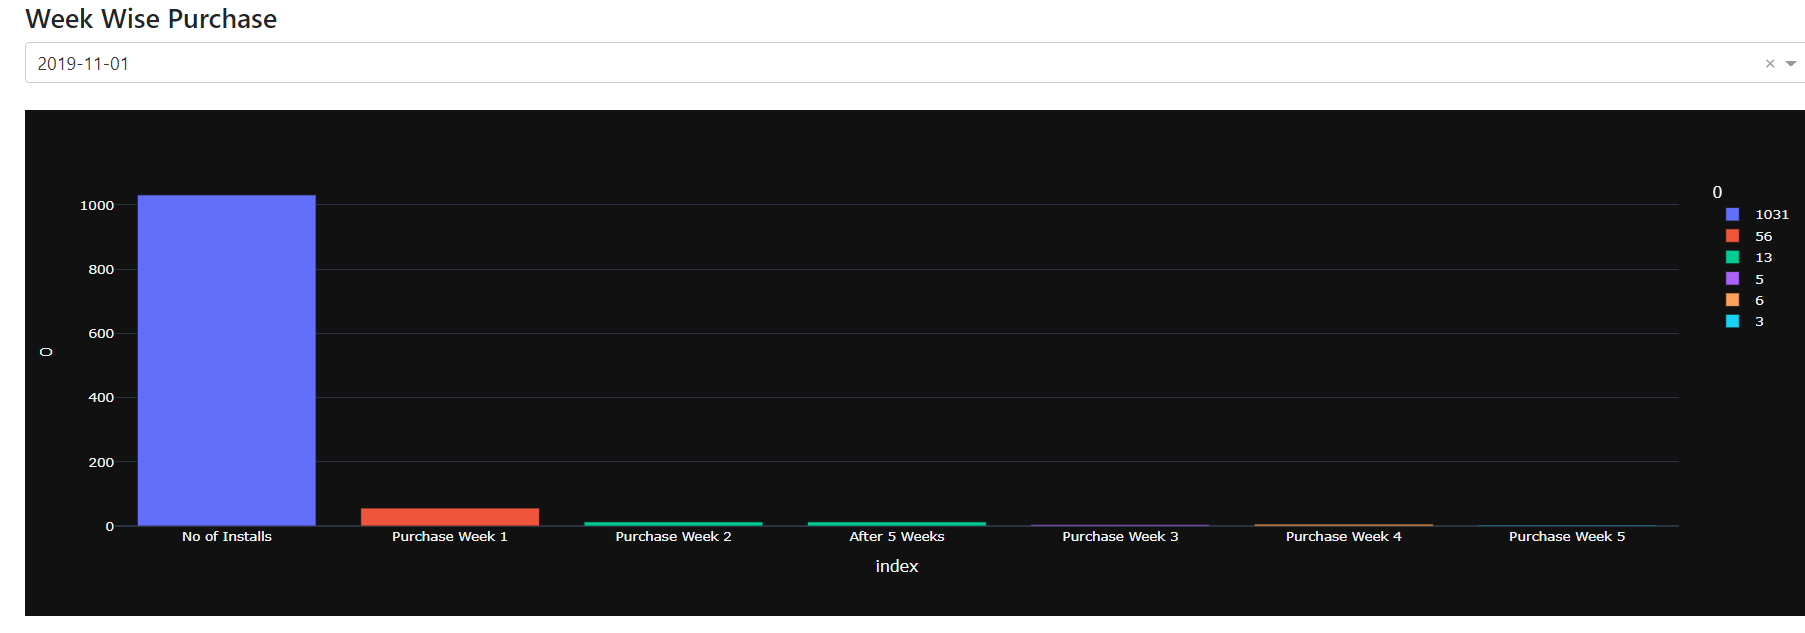